docker run -p 8888:8888 my-midas-project


In [30]:
# %matplotlib inline
# 1.5.3 pandas
import datetime


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from midas.mix import mix_freq, mix_freq2
from midas.adl import estimate, forecast, midas_adl, rmse, estimate2,forecast2, midas_adl2
print(pd.__version__)


2.2.3


In [31]:
weekly_sales = pd.read_csv('./testData/2024/df_vacum_grouped_weekly2024.csv', index_col=0, parse_dates=True)
google_trends = pd.read_csv('./testData/2024/multiTimeline.csv')

In [32]:
weekly_sales.columns = ['Total_Amount']  # or any name you like

# Reset index to bring 'week_group' (currently index) back as a column
weekly_sales = weekly_sales.reset_index()

# Rename 'week_group' to 'Week_Start_Date' or any name you want
weekly_sales = weekly_sales.rename(columns={'week_group': 'Week_Start_Date'})

print(weekly_sales.columns)
google_trends = google_trends.rename(columns={'Week': 'date'})
print(google_trends.columns)
weekly_sales['date'] = weekly_sales['date'].astype(str)
google_trends['date'] = google_trends['date'].astype(str)


Index(['date', 'Total_Amount'], dtype='object')
Index(['date', 'เครื่องดูดฝุ่น: (Thailand)', 'vacuum: (Thailand)',
       'robot vacuum: (Thailand)', 'เครื่องดูดฝุ่น ราคา: (Thailand)',
       'หุ่นยนต์ดูดฝุ่น: (Thailand)'],
      dtype='object')


In [33]:
print(weekly_sales.head())
print(google_trends.head())

         date  Total_Amount
0  2023-12-31       60387.0
1  2024-01-07       90752.0
2  2024-01-14      496275.0
3  2024-01-21      401465.0
4  2024-01-28      642054.0
         date  เครื่องดูดฝุ่น: (Thailand)  vacuum: (Thailand)  \
0  2023-12-31                          95                  39   
1  2024-01-07                          88                  50   
2  2024-01-14                          95                  44   
3  2024-01-21                          93                  41   
4  2024-01-28                         100                  45   

   robot vacuum: (Thailand)  เครื่องดูดฝุ่น ราคา: (Thailand)  \
0                         4                                6   
1                         5                                4   
2                         7                                5   
3                         3                                4   
4                         5                                6   

   หุ่นยนต์ดูดฝุ่น: (Thailand)  
0                      

In [34]:
merge = pd.merge(google_trends, weekly_sales, on='date', how='inner')

In [35]:
merge

,date,เครื่องดูดฝุ่น: (Thailand),vacuum: (Thailand),robot vacuum: (Thailand),เครื่องดูดฝุ่น ราคา: (Thailand),หุ่นยนต์ดูดฝุ่น: (Thailand),Total_Amount
0,2023-12-31,95,39,4,6,9,60387.0
1,2024-01-07,88,50,5,4,10,90752.0
2,2024-01-14,95,44,7,5,8,496275.0
3,2024-01-21,93,41,3,4,10,401465.0
4,2024-01-28,100,45,5,6,11,642054.0
5,2024-02-04,76,44,4,3,10,26896.0
6,2024-02-11,93,46,4,5,10,254991.0
7,2024-02-18,79,53,5,5,9,18628.0
8,2024-02-25,83,46,5,0,9,117773.0
9,2024-03-03,72,45,0,4,7,567036.0


In [37]:
merge.columns

Index(['date', 'เครื่องดูดฝุ่น: (Thailand)', 'vacuum: (Thailand)',
       'robot vacuum: (Thailand)', 'เครื่องดูดฝุ่น ราคา: (Thailand)',
       'หุ่นยนต์ดูดฝุ่น: (Thailand)', 'Total_Amount',
       'Total_Amount_Normalized'],
      dtype='object')

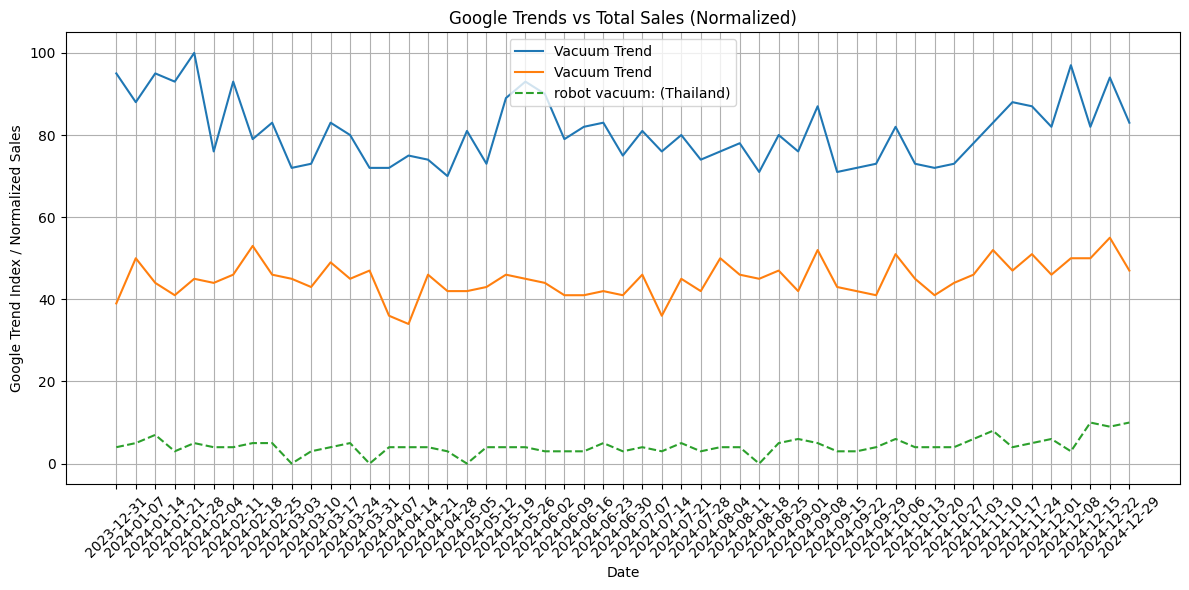

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Example DataFrame
# df contains: ['date', 'เครื่องดูดฝุ่น: (Thailand)', 'Hitachi: (Thailand)', 'Total_Amount']

# Normalize 'Total_Amount' to the same 0-100 scale as Google Trend data
scaler = MinMaxScaler(feature_range=(0, 100))

merge['Total_Amount_Normalized'] = scaler.fit_transform(merge[['Total_Amount']])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merge['date'], merge['เครื่องดูดฝุ่น: (Thailand)'], label='Vacuum Trend')
plt.plot(merge['date'], merge['vacuum: (Thailand)'], label='Vacuum Trend')
plt.plot(merge['date'], merge['robot vacuum: (Thailand)'], label='robot vacuum: (Thailand)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Google Trend Index / Normalized Sales')
plt.title('Google Trends vs Total Sales (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
for i in merge.columns:
    if i == 'date':
        continue
    print(i + ": " + str(merge['Total_Amount_Normalized'].corr(merge[i])))

เครื่องดูดฝุ่น: (Thailand): 0.3911306367189232
vacuum: (Thailand): 0.32883580326009004
robot vacuum: (Thailand): -0.01039339588590889
เครื่องดูดฝุ่น ราคา: (Thailand): 0.20951835308866373
หุ่นยนต์ดูดฝุ่น: (Thailand): 0.2180873629136201
Total_Amount: 1.0
Total_Amount_Normalized: 1.0


In [85]:
merge['เครื่องดูดฝุ่น **2'] = merge['เครื่องดูดฝุ่น: (Thailand)'] ** 3
merge['vacuum **2'] = merge['vacuum: (Thailand)'] **3
print(merge['Total_Amount_Normalized'].corr(merge['เครื่องดูดฝุ่น **2']))
print(merge['Total_Amount_Normalized'].corr(merge['vacuum **2']))

0.40070916198890894
0.3224090174920171


In [63]:
merge['sq_sum'] = merge['เครื่องดูดฝุ่น: (Thailand)']**2 + merge['vacuum: (Thailand)']**2 + merge['robot vacuum: (Thailand)']**2
print(merge['Total_Amount_Normalized'].corr(merge['sum']))
merge['sq_sum_scale'] = 100 * (merge['sq_sum'] - merge['sq_sum'].min()) / (merge['sq_sum'].max() - merge['sq_sum'].min())
print(merge['Total_Amount_Normalized'].corr(merge['sq_sum_scale']))


0.4323694818269486
0.4323694818269484


In [83]:
merge['sum'] = merge['เครื่องดูดฝุ่น: (Thailand)'] + merge['vacuum: (Thailand)'] + merge['robot vacuum: (Thailand)']
norm = (merge['sum'] - merge['sum'].min()) / (merge['sum'].max() - merge['sum'].min())
gamma = 0.7  # You can change this
merge['sum_gamma'] = norm ** gamma
merge['sum_gamma_scaled'] = 100 * merge['sum_gamma']
print(merge['Total_Amount_Normalized'].corr(merge['sum_gamma_scaled']))

0.3894946106636307


In [65]:
from scipy.stats import zscore

# Calculate z-score for merge['sum']
merge['sum_zscore'] = zscore(merge['sum'])

# Show correlation with Total_Amount_Normalized
print(merge['Total_Amount_Normalized'].corr(merge['sum_zscore']))

0.3979084088826618


In [106]:
thailand_CCI = [62.9, 63.8, 63, 62.1, 60.5, 58.9, 57.7, 56.5, 55.3, 56, 56.9, 57.9]
merge['date'] = pd.to_datetime(merge['date'])

def create_cci_series(date):
    if date.year < 2024:
        return thailand_CCI[0]
    else:
        return thailand_CCI[date.month - 1]

merge['thailand_CCI'] = merge['date'].apply(create_cci_series)
merge['thailand_CCI_norm'] = (merge['thailand_CCI'] - merge['thailand_CCI'].min()) / (merge['thailand_CCI'].max() - merge['thailand_CCI'].min())

In [111]:
merge['CCIxsq_sum_scale'] = merge['thailand_CCI_norm']*0.3 + merge['sq_sum_scale']*0.7
print(merge['Total_Amount_Normalized'].corr(merge['CCIxsq_sum_scale']))

0.4314018297738534


In [96]:
merge.columns

Index(['date', 'เครื่องดูดฝุ่น: (Thailand)', 'vacuum: (Thailand)',
       'robot vacuum: (Thailand)', 'เครื่องดูดฝุ่น ราคา: (Thailand)',
       'หุ่นยนต์ดูดฝุ่น: (Thailand)', 'Total_Amount',
       'Total_Amount_Normalized', 'เครื่องดูดฝุ่น **2', 'vacuum **2', 'sum',
       'sum **2', 'sq_sum', 'sq_sum_scale', 'sum_gamma', 'sum_gamma_scaled',
       'sum_zscore', 'thailand_CCI', 'CCIxsq_sum_scale'],
      dtype='object')

In [116]:
# Normalize the specified columns to 0-100 scale
cols_to_normalize = [
    'เครื่องดูดฝุ่น: (Thailand)', 
    'vacuum: (Thailand)', 
    # 'robot vacuum: (Thailand)', 
    # 'เครื่องดูดฝุ่น ราคา: (Thailand)', 
    # 'หุ่นยนต์ดูดฝุ่น: (Thailand)'
]
cols_norm = []
for col in cols_to_normalize:
    merge[col + '_normalized'] = 100 * (merge[col] - merge[col].min()) / (merge[col].max() - merge[col].min())
    cols_norm.append(col+'_normalized')
merge['new_sum'] = merge[cols_norm].sum(axis=1)
merge['sq_new_sum'] = merge[cols_norm].pow(2).sum(axis=1)
merge['3sq_new_sum'] = merge[cols_norm].pow(3).sum(axis=1)
print(merge['Total_Amount_Normalized'].corr(merge['new_sum']))
print(merge['Total_Amount_Normalized'].corr(merge['sq_new_sum']))
print(merge['Total_Amount_Normalized'].corr(merge['3sq_new_sum']))

0.4423046198643021
0.45587131208453524
0.45055676947719125


In [119]:
merge['CCIxsq_new_sum'] = merge['thailand_CCI_norm']*0.3 + merge['sq_new_sum']*0.7
print(merge['Total_Amount_Normalized'].corr(merge['CCIxsq_new_sum']))

0.4558653484579514


In [126]:
weekly_scores = [
    8,  # Dec 31–Jan 6 (New Year)
    2,  # Jan 7–13
    2,  # Jan 14–20
    6,  # Jan 21–27 (near Chinese New Year prep)
    7,  # Jan 28–Feb 3 (Chinese New Year Feb 9–10)
    2,  # Feb 4–10
    5,  # Feb 11–17 (Valentine's + Makha Bucha Feb 24)
    2,  # Feb 18–24
    2,  # Feb 25–Mar 2
    2,  # Mar 3–9
    2,  # Mar 10–16
    2,  # Mar 17–23
    4,  # Mar 24–30 (lead into April holidays)
    7,  # Mar 31–Apr 6 (Chakri Day Apr 6)
    10, # Apr 7–13 (Songkran prep)
    10, # Apr 14–20 (Songkran week)
    3,  # Apr 21–27
    6,  # Apr 28–May 4 (Labor Day May 1)
    4,  # May 5–11
    6,  # May 12–18 (Visakha Bucha May 22)
    3,  # May 19–25
    2,  # May 26–Jun 1
    4,  # Jun 2–8 (Queen Suthida's BD June 3)
    2,  # Jun 9–15
    2,  # Jun 16–22
    2,  # Jun 23–29
    2,  # Jun 30–Jul 6
    7,  # Jul 7–13 (Asarnha Bucha Jul 20)
    8,  # Jul 14–20 (Buddhist Lent Jul 21)
    6,  # Jul 21–27 (King’s BD Jul 28)
    3,  # Jul 28–Aug 3
    6,  # Aug 4–10 (Mother's Day Aug 12)
    2,  # Aug 11–17
    2,  # Aug 18–24
    2,  # Aug 25–31
    2,  # Sep 1–7
    2,  # Sep 8–14
    2,  # Sep 15–21
    4,  # Sep 22–28
    6,  # Sep 29–Oct 5 (King Bhumibol Memorial Oct 13)
    2,  # Oct 6–12
    6,  # Oct 13–19 (Chulalongkorn Day Oct 23)
    3,  # Oct 20–26
    2,  # Oct 27–Nov 2
    2,  # Nov 3–9
    2,  # Nov 10–16
    5,  # Nov 17–23 (Black Friday Nov 29)
    6,  # Nov 24–30 (Cyber Monday Dec 2)
    5,  # Dec 1–7 (Father's Day Dec 5)
    2,  # Dec 8–14
    2,  # Dec 15–21
    7,  # Dec 22–28 (Christmas week)
    9,  # Dec 29–Jan 4, 2025 (New Year prep)
]
merge['weekly_holiday_score'] = weekly_scores[:len(merge)]
print(merge['Total_Amount_Normalized'].corr(merge['weekly_holiday_score']))
merge['weekly_holiday_score_norm'] = (merge['weekly_holiday_score'] - merge['weekly_holiday_score'].min()) / (merge['weekly_holiday_score'].max() - merge['weekly_holiday_score'].min())
merge['weekly_holiday_score_norm'] = merge['weekly_holiday_score_norm']*0.5+0.75

-0.13780592764779462


In [ ]:
merge['weekly_holiday_score_norm'] 


0     1.1250
1     0.7500
2     0.7500
3     1.0000
4     1.0625
5     0.7500
6     0.9375
7     0.7500
8     0.7500
9     0.7500
10    0.7500
11    0.7500
12    0.8750
13    1.0625
14    1.2500
15    1.2500
16    0.8125
17    1.0000
18    0.8750
19    1.0000
20    0.8125
21    0.7500
22    0.8750
23    0.7500
24    0.7500
25    0.7500
26    0.7500
27    1.0625
28    1.1250
29    1.0000
30    0.8125
31    1.0000
32    0.7500
33    0.7500
34    0.7500
35    0.7500
36    0.7500
37    0.7500
38    0.8750
39    1.0000
40    0.7500
41    1.0000
42    0.8125
43    0.7500
44    0.7500
45    0.7500
46    0.9375
47    1.0000
48    0.9375
49    0.7500
50    0.7500
51    1.0625
52    1.1875
Name: weekly_holiday_score_norm, dtype: float64